# Classificação de Texto - Sentimento Positivo/Negativo

In [18]:
#Importando as bibliotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
#nltk.download('stopwords')
#nltk.download('rslp')
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [19]:
# Carregando o dataset
df = pd.read_csv('../../datasets/comentarios.csv')

In [20]:
# Informações do arquivo
df.shape

(248, 2)

In [21]:
df.head()

,texto,sentimento
0,"Amei a qualidade do produto, realmente excelente!",positivo
1,"Chegou muito rápido, fiquei impressionado com ...",positivo
2,"Design moderno e funcional, cumpre o que promete.",positivo
3,"Me surpreendi positivamente, vale cada centavo!",positivo
4,"O material é resistente, exatamente o que eu p...",positivo


In [22]:
# Verificar distribuição das classes
df['sentimento'].value_counts()

sentimento
positivo    124
negativo    124
Name: count, dtype: int64

In [23]:
# Função para limpeza e pre-processamento
def limpar_texto(texto):
  #Converte para minuscula
  texto = texto.lower()

  # Tokenizar
  tokens = texto.split()

  #Remover stopwords
  stop_words_pt = set(stopwords.words('portuguese'))
  tokens = [word for word in tokens if word not in stop_words_pt]

  # Stemming
  stemmer = RSLPStemmer()
  tokens_stem = [stemmer.stem(word) for word in tokens]

  # Rejuntar tokens em string novamente
  texto_processado = " ".join(tokens_stem)
  return texto_processado

In [24]:
type(df['texto'])

pandas.core.series.Series

In [25]:
df['texto_limpo'] = df['texto'].apply(limpar_texto)
print(f"Original: {df['texto'][0]}")
print(f"Limpo: {df['texto_limpo'][0]}")

Original: Amei a qualidade do produto, realmente excelente!
Limpo: ame qual produto, real excelente!


In [26]:
# Vetorizacao
vetor_tfidf = TfidfVectorizer()
X = vetor_tfidf.fit_transform(df['texto_limpo'])
y = df['sentimento']

In [27]:
# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)

In [ ]:
# Treinar o classificador
modelo_nb = MultinomialNB()
modelo_nb.fit(X_train, y_train)

MultinomialNB()

In [35]:
type(X_test)

scipy.sparse._csr.csr_matrix

In [29]:
# Avaliar o modelo
y_pred = modelo_nb.predict(X_test)
acuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia do Naive Bayes: {acuracia}")

Acurácia do Naive Bayes: 0.74


In [31]:
# Relatório
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negativo       0.77      0.68      0.72        25
    positivo       0.71      0.80      0.75        25

    accuracy                           0.74        50
   macro avg       0.74      0.74      0.74        50
weighted avg       0.74      0.74      0.74        50



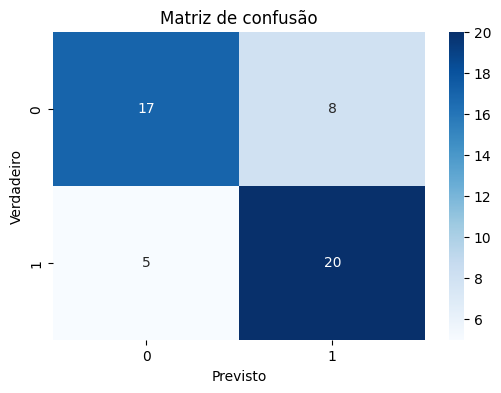

In [32]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Matriz de confusão')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()


In [33]:
# Cross-Validation
scores = cross_val_score(modelo_nb, X, y, cv=5, scoring='accuracy')
print(f'Acurácia na Validação Cruzada: {scores}')

Acurácia na Validação Cruzada: [0.74       0.78       0.66       0.65306122 0.7755102 ]


In [34]:
print(f'Acurácia Média: {scores.mean()}')

Acurácia Média: 0.7217142857142858


In [45]:
# Teste de uma única frase
frase_teste = "Eu odiei este produto! Não Funciona."
frase_limpa = limpar_texto(frase_teste)
frase_vetorizada = vetor_tfidf.transform([frase_limpa])
predicao = modelo_nb.predict(frase_vetorizada)
resultado = predicao[0]
print(f'Sentimento Previsto: {resultado}')

Sentimento Previsto: negativo
